<a href="https://colab.research.google.com/github/pdalcastel/nipah_virus_innate_immunity/blob/main/nipah_virus_antagonist_innate_immune_response_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Novel Nipah Virus Immune-Antagonism Strategy Revealed by Experimental and Computational Study" - Replication Attempt**
Reference: Seto, J., Qiao, L., Guenzel, C. A., Xiao, S., Shaw, M. L., Hayot, F., & Sealfon, S. C. (2010). Novel Nipah Virus Immune-Antagonism Strategy Revealed by Experimental and Computational Study. J. Virol., 84(21), 10965. doi: 10.1128/JVI.01335-10 \\
By: Pedro Cenci Dal Castel, Indiana University Bloomington, 04/12/2023


Disclaimer: this simulations failed to fully replicate the experimental results. Graph curves do not match, maximum values do not match, and I could not check whether the raw output matches because they normalize their results in a way that was not clear. Also there was no peer review, so parameters and equations could be wrongly implemented/converted. For this reason, I limit the purpose of this notebook to convey some basic knowledge about innate immunity and explain the equations they used to model the pathways.

**Introduction** \\

After viruses made into the cells of a tissue, the innate immune system is the first layer of defense. Besides resident and recruited immune cells, the innate immunity includes a mechanism that allows the tissue to defend itself against the virus in the abcense of any cells of the immune system. There are certain molecules of the virus, like the single stranded mRNA and other proteins, that the cell can detect and activate the production of cytokines like Tumor Necrosis Factor Alpha (TNFA), Interferons Alpha and Beta (IFNA and IFNB). Although the host cell is sure to dye, the cytokines get released in the environment, allerting neighboring cells. The uninfected cells of the tissue, when detecting high concentrations of cytokines in the environment, prepare their defenses producing anti-viral peptides and other proteins that destroy viruses or inhibit their replication. \\

Nipah Virus causes encephalitis (brain inflammation) and kills 40 to 75% of its victims. One of the reasons behind its lethality may be that Nipah Virus shuts down the production of IFNA/IFNB inside the host cells. The proteins P, W and V carried and produced by the virus inhibit the JAK/STAT pathway, the main mediator of interferon production. \\

The diagram below outlines the interaction between the virus and the IFN production pathway:

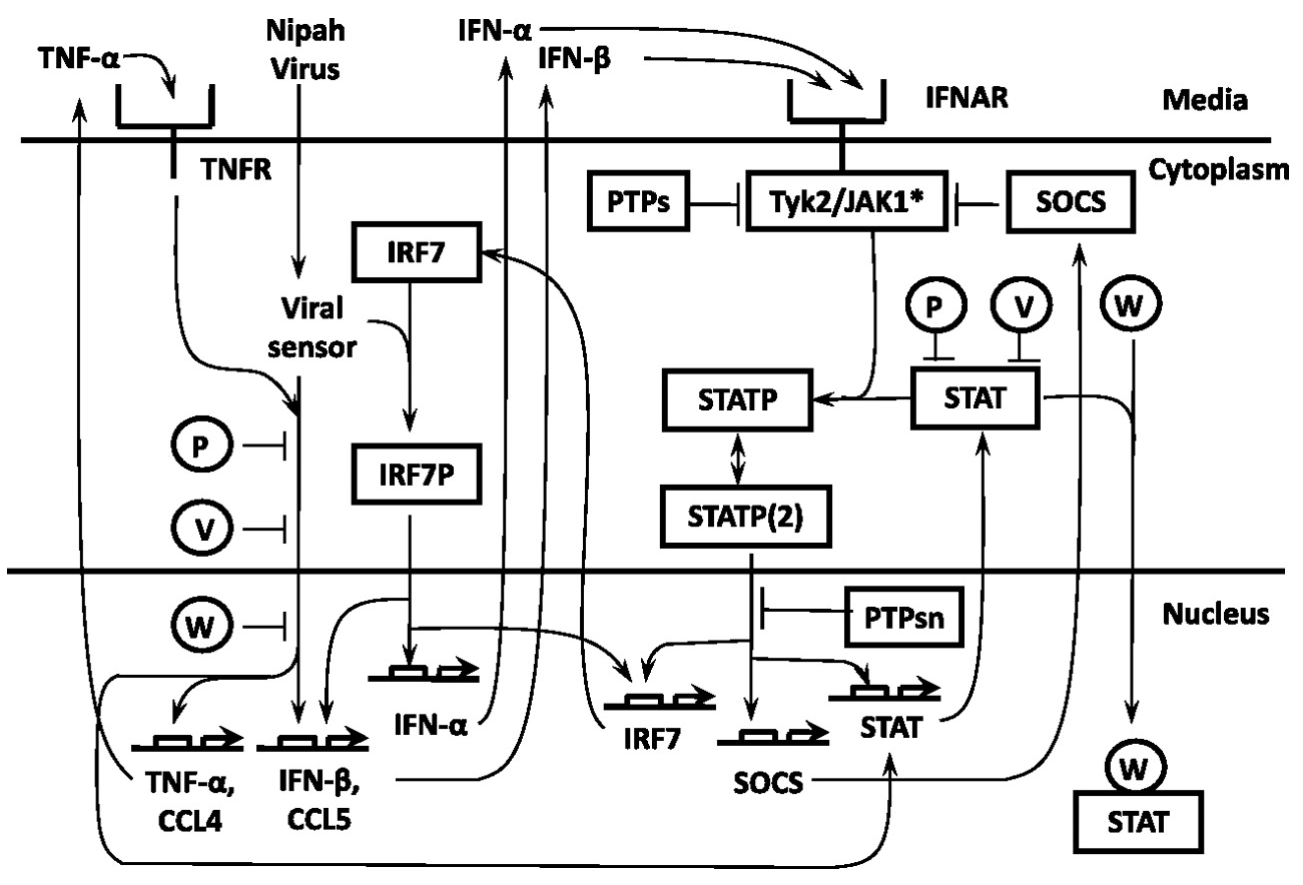

To understand the diagram, let's look at some pathways in isolation. Disclaimer: my diagrams are faithful to the equations, not to the diagram above. Starting with TNFA pathway (not considering STAT, IRF7 etc.). It is composed by two species: TNFAm, the mRNA inside the nucleus, and the TNFAenv, the actual TNFA secreted in the medium. It can be simplified to my beautiful paint masterpiece diagram:

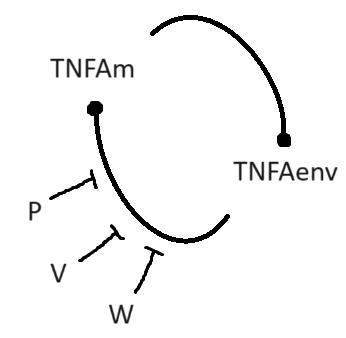

TFNAm (mRNA for TFNA) promotes production of TNFAenv (TNFA secreted in the environment), and TFNAenv promotes TNFAm. Usually this is a bistable system, but the way they model it, with decay on TNFAm but no decay on TNFAenv, what happens is that TNFAenv linearly tends to infinity, while TNFAm tends to its maximum. P and V act by decreasing the maximum value of TNFAm, while W has the capacity to shut it down completely if too high. \\

I am not using normal arrows because normal arrows represent flow of matter, i.e., what you loose on the arrow tail you gain on the arrow tip. However, there is now flow of matter in this network. Production of TNFAm does not use up TNFAenv, and TNFAm production does not use up TFNAm.

Now let's look at the STAT pathway:

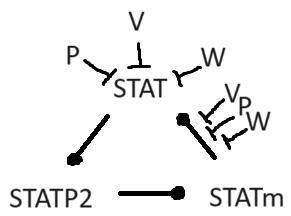

Again we see a positive feedback loop of promotions (again there is no flow of matter being considered here). P, V and W act in two ways, first, they inhibit production of STAT by STATm, and hijack STAT, reducing its value. Without the P, V and W proteins, this positive feedback loop is a bistable sistem, and it really is in their model because all species decay. \\

These two networks are connected by TNFAenv activation of STATm and IRF7 production and activation of TNFAm, like this:

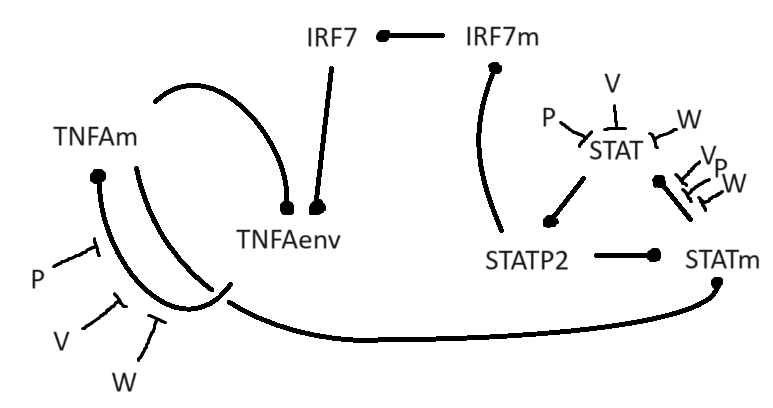

And they are connected in a positive feedback loop again, so they help each other to reach high levels. The only way you can suppress this loop is by including the Nipah Virus proteins V, P and W. SOCS could shut down STAT pathway by inhibiting phosphorylation of JAK1, but I don't see this effect with the parameters and time scale that they studied in the paper. \\

The IFNA and IFNB behave in a similar way, it is also a positive feedback loop. Not a bistable system, same as TNFAenv, IFNAenv and IFNBenv do not decay. IFNA and IFNB both stimulate production of STATP2, helping STAT feedback loop and linking to IRF7, which stimulate production of both IFNA and IFB, cloosing the loop.

Now let's summarize the compelte diagram: \\


1. Starting at "Nipah Virus", the virus enters the cell, and viral particles are detected by the cell ("Viral sensor" in the "Cytoplasm" compartment)
2. The detected viral particles activate the IFNA, IFNB, and TNFA mRNAs (bottom left in the "Nucleus" compartment)
3. the three cytokines (IFNA, IFNB and TNFA) are produced and secreted (upper compartment "Media")
4. Once outside the cell, the cytokines are sensed by the cell (self and neighbors)
5. IFN receptors promotes JAK phosphorylation ("IFNAR" and "Tyk2/JAK1*")
6. JAK* activates STATP, that phosphorylates, dimerizes, enters the nucleus
7. STATP(2) activates three mRNAs: IRF7m, SOCSm and STATm. SOCSm produced SOCS that eventually shuts down the inflammatory process. STATm produces STAT, closing a positive feedback loop that amplifies the interferon response.
8. Finally, IRF7 phosphorylates and promotes the production and secretion of IFNA and IFNB
\\

The role of the proteins P, V and W are to suppress STAT signaling. W also suppresses mRNAs for TNFA, CCL4, IFNB and CCL5, while V and P promote them. The diagram shows P and V as inhibitors of these mRNAs, but the equations say otherwise.

The key question in the paper is how Nipah Virus (NiH) supresses the inflammatory response. They combined simulation (ODE model) with data from experiments to infer on how the innate-antagonism mechanism of NiV takes place. \\

In the experiments, they took the Newcastle Disease Virus (NDV) and genetically modified them to include genes encoding P, V and W proteins believed to play a role in the NiV immune-antagonist mechanism. They proliferated the modified NDVs and infected a culture of human Dendritic Cells (DCs). I highlight this experimental result below, where they tested the normal NDV against three modifications of NDV, each one to express either V, P or W proteins from NiV.

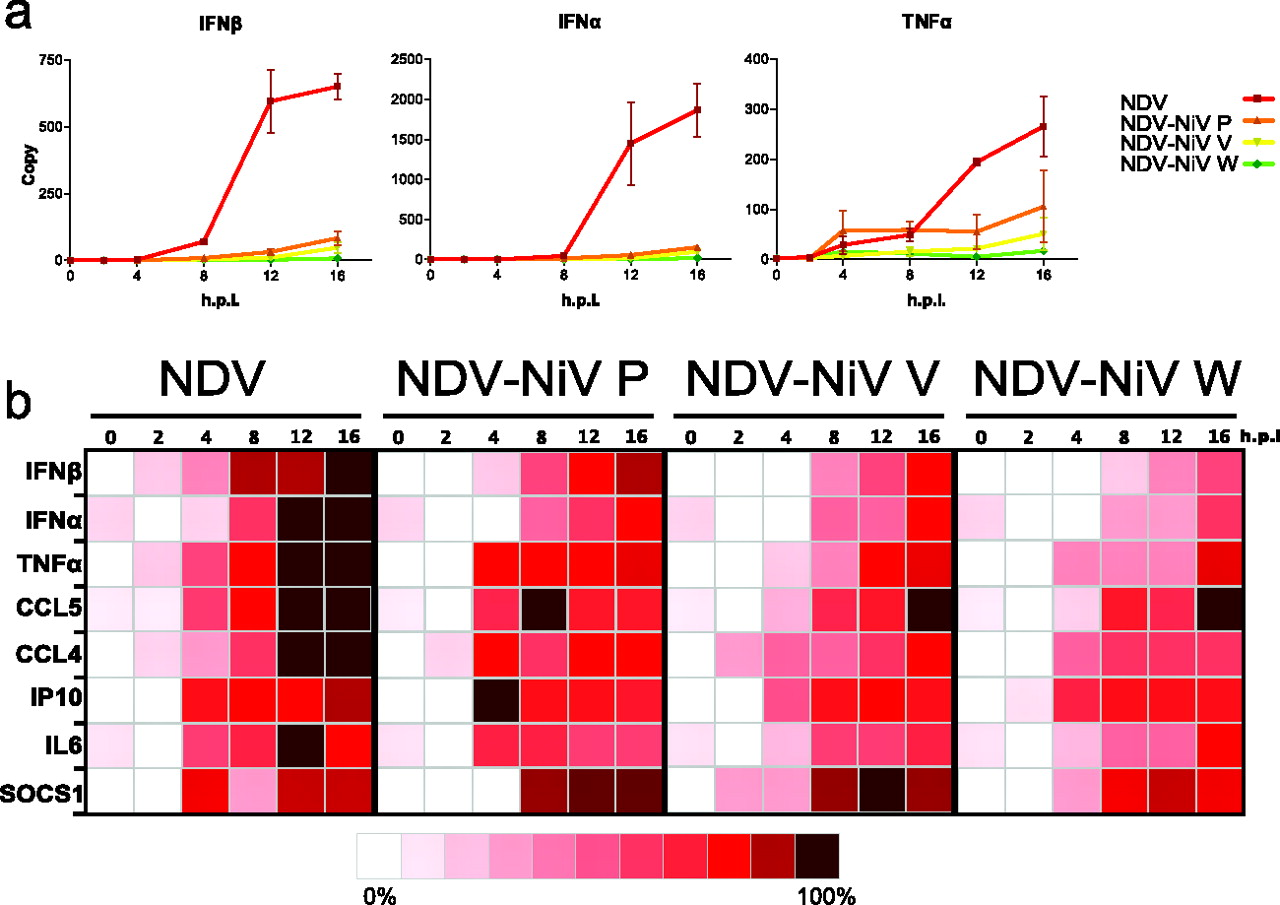

As you can see, the expression of cytokines is much higher for the NDV with no expression of P, V or W. It is clear that these three proteins supress the expression of cytokines, impairing innate immunity.

**The Mathematical Model** \\

Comprising of 14 ordinary differential equations and 49 parameters, the mathematical model described by the previous diagram adopted a few assumptions:
1. Binding of IFN in IFNAR is fast, implying that the time derivative of Tyk2/JAK1 is negligible (quasi equilibrium).
2. Quasi equilibrium was assumed for JAK*/SOCS hijacking, STAT phosphorylation, STATP dimerization, SOCS production, IRF7 production and IRF7 phosphorylation.
3. The amount of STATP is negligible relative to the amount of STAT, implying that the conservation of mass during the phosphorylation process is negligible.
4. The presence of the virus inside the cell is modeled by letting P, V and W increase linearly in time.
5. Viral life-cycle is neglected.
6. The initial condition of all species is zero excpet for STAT, which starts at a value of 0.1 micro Mols / mL

The full model description is provided in the supplemental materials accessible at https://journals.asm.org/doi/suppl/10.1128/jvi.01335-10/suppl_file/nipah_supp_jvi.pdf

I will leave the list of equations below as a reference.

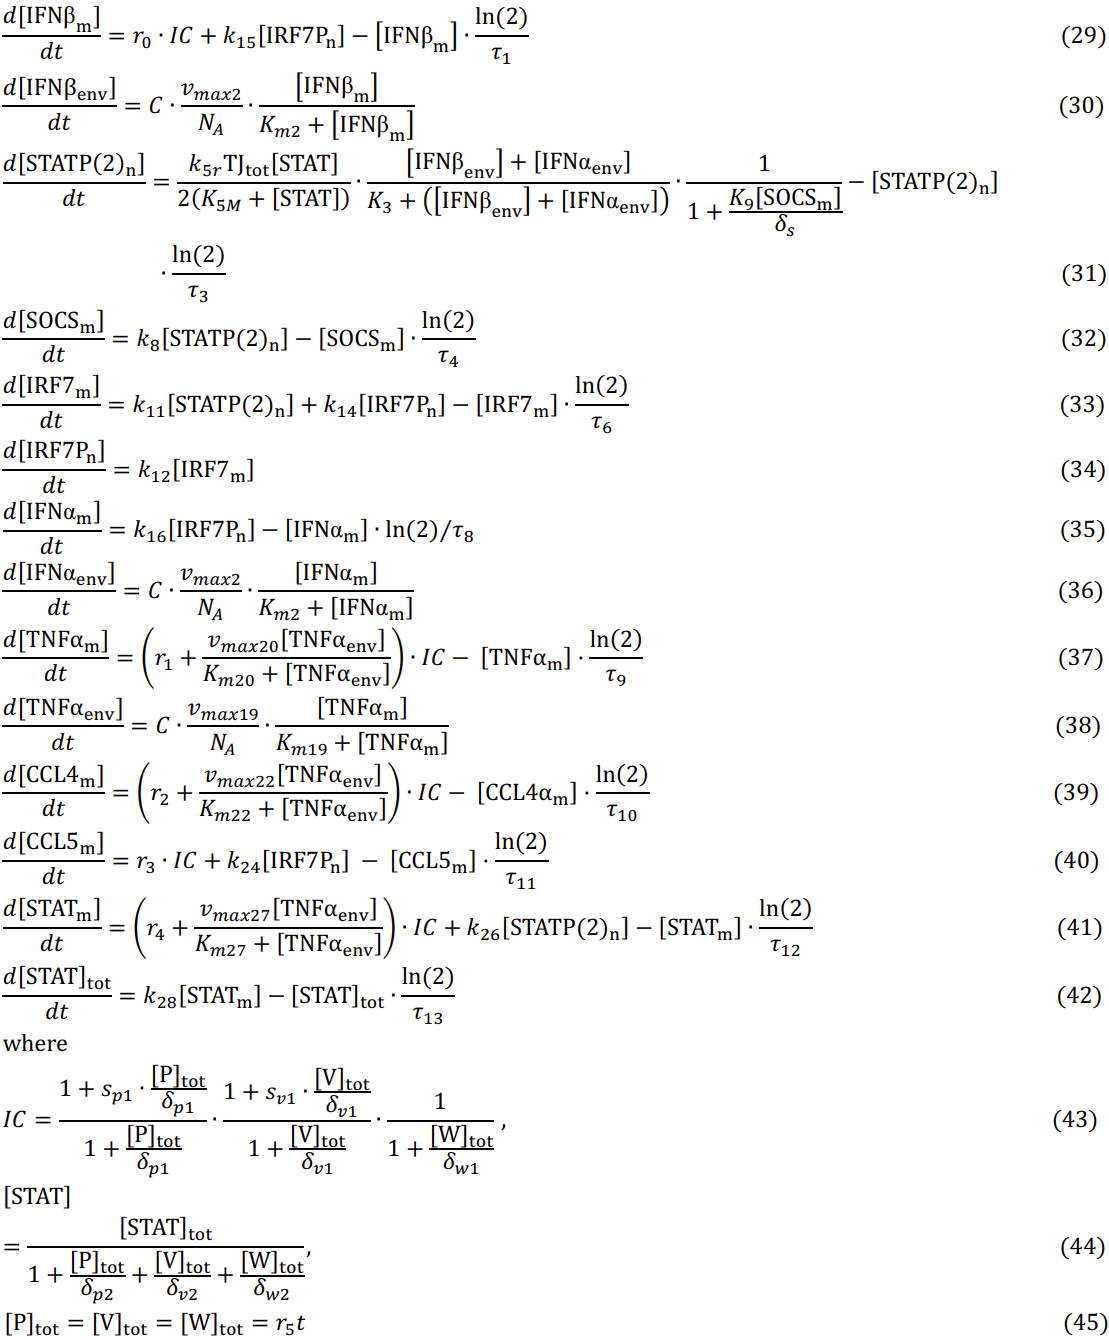

To facilitate your comprehension of these equations, I will guide you through the main equation terms and forms.
1. Let's take a look at equation 29, you should read it as "the rate of change of IFNBm is a constant basal rate 'r0' that is multiplied by IC (I will discuss it later) plus a rate proportional to IRF7Pn minus a negative rate that is proportional to IFNBm (self).". The basal rate r0 means that IFNBm is constantly being produced no matter what, but it is multiplied by IC, if IC=0, IFNBm can only be produced via IRF7Pn. The rate proportional to IRF7Pn means that IFNBm increases faster as higher is the level of IRF7Pn, the promoter. The last term, the negative rate proportional to self, this is a decay, it means that IFNBm is always being lost by degradation. This pattern of basal production, promotion and decay is very standard in many of the equations that follow.
2. Equation 30 is different. IFNBenv rate of production is proportional to a saturating function of IFNBm. This function in the format x/(1+x) tends to zero as x tends to zero, and tends to 1 as x tends to infinity. Therefore, IFNBenv is being activated by IFNBm, but it saturates. In the saturation, for IFNBm too high, the rate of production of IFNBenv is constant and given by the parameter vmax2.
3. Equation 30 is algebraically derived from a quasi-equilibrium assumption. See the supplemental materials for an explanation. In short, see that there are two promotions (one by STAT, other by IFNBenv + IFNAenv) and one inhibition (by SOCS) all multiplied together. This interaction means that, to produce STATP2n, both STAT and any of the two IFN are required, while SOCS must be low. If SOCS is high, that entire term goes to zero, shutting down STATP2n production completely. STATP2n also decays.
4. The other equations follow the same ideas.
5. Equation 43 finally gives us the definition of IC, the inhibition coefficient that depends on the levels of P, V and W proteins. Let's take a look at one factor at a time. The first two factors follow the pattern (1+c*x)/(1+x). This function goes to c as x goes to infinity, and to 1 as x goes to zero. The parameters sp1 and sv1 are lower than zero, which means that, if P or V are high, IC will be a value lower than 1. If you look back at equations 29, 37, etc., you will see that the production of all these species will be inhibited when V or P are high. If only one is high, inhibition happens, and they have a stronger effect when combined because of the multiplicative interaction. W's effect, on the other hand, follows a functional form that goes to zero as W goes to infinity, so W has the potential to make IC go to zero and completely shut down all the production terms you saw on previous equations (while V and P only reduce them to a lower value).
6. Equation 44 is simple, as either W, P or V increase, SOCS decreases, reaching zero. This is modeling the SOCS hijacking by P, V and W proteins.
7. The last equation is their "boundary condition". By setting P, V and W to grow linearly in time, they are basically saying that the presence of the virus inside the cell causes the constant rate of production of these proteins. They do not model viral replication inside the cell, only the effects of these three proteins.

The key parameters, which were fitted to experimental data are:
1. vmax2, controlling IFN production and secretion
2. k12, controlling IRF7 production
3. vmax20, controlling TNFAm promotion
4. vmax19, controlling TNFA production and secretion
5. sp1, controlling P protein supression of STAT

All other parameters were estimated based on sensible physiological observations or borrowed from previous models.


**Exercises** \\

The idea of the exercises is to guide you through a few tests you can do to understand what is the role of certain parameters and how the system behaves. Remember that I could not perfectly match the results to the paper's. Some parameters or equations could be wrong, and there were no peer review. Start by running the three cells below.

In [ ]:
# @title Installing Packages
%%capture
import os
!apt-get install libncurses5 # only for Google Colab
!pip install -q tellurium
os.kill(os.getpid(), 9)

In [ ]:
# @title Run this cell to initialize the program
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

def initialization():

  r = te.loada('''

  J1:  -> IFNBm; rate_IFNBm;
  J2:  -> IFNBenv; rate_IFNBenv;
  J3:  -> STATP2n; rate_STATP2n;
  J4:  -> SOCSm; rate_SOCSm;
  J5:  -> IRF7m; rate_IRF7m;
  J6:  -> IRF7Pn; rate_IRF7Pn;
  J7:  -> IFNAm; rate_IFNAm;
  J8:  -> IFNAenv; rate_IFNAenv;
  J9:  -> TNFAm; rate_TNFAm;
  J10: -> TNFAenv; rate_TNFAenv;
  J11: -> CCL4m; rate_CCL4m;
  J12: -> CCL5m; rate_CCL5m;
  J13: -> STATm; rate_STATm;
  J14: -> STATtot; rate_STATtot;

  rate_IFNBm := r0*IC + k15 * IRF7Pn - IFNBm * ln(2) / tau1
  r0 = 1E-6; // uM/h
  k15 = (1E-6)*3600; // (1/s)*s/h
  //k15 = 1E-6
  tau1 = 2; // h

  rate_IFNBenv := C * vmax2 / NA * IFNBm / (Km2 + IFNBm)
  rate_IFNAenv := C * vmax2 / NA * IFNAm / (Km2 + IFNAm)
  vmax2 = (20.1)*3600; // (molecules/s/cell)*s/h
  //vmax2 = 20.1
  Km2 = 2E-3; // uM
  C = 5E+5; // cells/mL
  NA = 6.023E+23 // molecules/mol avogadro

  TJstar := TJtot * (IFNBenv + IFNAenv)/(K3 + IFNBenv + IFNAenv)/(1 + SOCS/deltas)
  TJtot = 1E-4; // uM
  K3 = 4.3E-7; // uM
  deltas = 1E-3; // uM

  rate_STATP2n := k5r * TJstar * STAT / (K5M + STAT) / 2 - STATP2n * ln(2)/tau3
  k5r = 1*3600; // (1/s)*s/h
  //k5r = 1
  K5M = 0.01; // uM
  K9 = 7.8E+2; // adimensional
  tau3 = 0.56; // h

  rate_SOCSm := k8 * STATP2n - SOCSm * ln(2)/tau4
  k8 = (1E-6)*3600; // (1/s)*s/h
  //k8 = (1E-6)
  tau4 = 0.46; // h

  SOCS := K9 * SOCSm

  rate_IRF7m := k11 * STATP2n + k14 * IRF7Pn - IRF7m * ln(2)/tau6
  k11 = (1E-6)*3600; // (1/s)*s/h
  //k11 = (1E-6)
  k14 = (8.9E-8)*3600; // (1/s)*s/h
  //k14 = (8.9E-8)
  tau6 = 2; // h

  rate_IRF7Pn := k12 * IRF7m
  k12 = (0.12)*3600 // (1/s)*s/h
  //k12 = (0.12)

  rate_IFNAm := k16 * IRF7Pn - IFNAm * ln(2)/tau8
  k16 = (1E-6)*3600; // (1/s)*s/h
  //k16 = (1E-6)
  tau8 = 2; // h

  rate_TNFAm := (r1 + vmax20 * TNFAenv / (Km20 + TNFAenv))*IC - TNFAm * ln(2)/tau9
  r1 = 1E-4; // uM/h
  vmax20 = 1E-3 // uM/h
  Km20 = 2E-4; // uM
  tau9 = 2; // h

  rate_TNFAenv := C * vmax19 / NA * TNFAm / (Km19 + TNFAm)
  vmax19 = (45.8)*3600 // (molecules/s/cell)*s/h
  //vmax19 = (45.8)
  Km19 = 4E-3; // uM

  rate_CCL4m := (r2 + vmax22 * TNFAenv / (Km22 + TNFAenv))*IC - CCL4m * ln(2)/tau10
  r2 = 1E-4; // uM/h
  vmax22 = 5E-4; // uM/h
  Km22 = 2E-4; // uM
  tau10 = 2; // h

  rate_CCL5m := r3*IC + k24 * IRF7Pn - CCL5m * ln(2)/tau11
  r3 = 1E-6; // uM/h
  k24 = (1E-6)*3600; // (1/s)*s/h
  //k24 = (1E-6)
  tau11 = 2; // h

  rate_STATm := (r4 + vmax27 * TNFAenv / (Km27 + TNFAenv))*IC + k26 * STATP2n - STATm * ln(2)/tau12
  r4 = 1E-4; // uM/h
  vmax27 = 5E-4; // uM/h
  Km27 = 2E-4; // uM
  //k26 = (1E-6)*3600; // (1/s)*s/h
  k26 = (1E-6)
  tau12 = 2; // h

  rate_STATtot := k28 * STATm - STATtot * ln(2)/tau13
  k28 = (0.1)*3600; // (1/s)*s/h
  //k28 = (0.1)
  tau13 = 15; // h

  //STAT := STATtot
  //IC := 1
  STAT := STATtot/(1+P/deltap2+V/deltav2+W/deltaw2)
  IC := (1+sp1*P/deltap1)/(1+P/deltap1)*(1+sv1*V/deltav1)/(1+V/deltav1)/(1+W/deltaw1)
  sp1 = 0.57; // adimensional
  deltap1 = 1E-3; // uM
  sv1 = 0.3; // adimensional
  deltav1 = 1E-3; // uM
  deltaw1 = 1E-3; // uM
  deltap2 = 1E-3; // uM
  deltav2 = 5E-4; // uM
  deltaw2 = 2E-4; // uM

  P := r5*time*P_flag
  V := r5*time*V_flag
  W := r5*time*W_flag
  P_flag=1
  V_flag=1
  W_flag=1

  r5 = 0.1; // uM/h

  IFNBm_norm := IFNBm/(r0*tau1/ln(2))
  IFNBenv_norm := IFNBenv/(6e-16)/2
  IFNAm_norm := IFNAm/(k16*tau8/ln(2))
  IFNAenv_norm := IFNAenv/(5e-22)/16
  TNFAm_norm := TNFAm/((r1+vmax20)*tau9/ln(2))
  TNFAenv_norm := TNFAenv/(7E-14)/1.75
  CCL4m_norm := CCL4m/((r2+vmax22)*tau10/ln(2))
  CCL5m_norm := CCL5m/(r3*tau11/ln(2))

  //Initial values:
  STATtot = 0.1
  //STATm = 0.1
  //STATP2n = 0.1

  ''')
  return(r)
  #r.simulate(0,10,100,['time', 'IFNBenv', 'IFNAenv', 'IRF7Pn', 'TNFAm', 'TNFAenv'])
  #r.simulate(0,10,1000,['time','IFNBenv'])
  #r.plot(logy=False)

species_selection = widgets.SelectMultiple(
    options=['IFNAenv_norm', 'IFNBenv_norm', 'TNFAenv_norm', 'IFNAm_norm', 'IFNBm_norm','TNFAm_norm','CCL4m_norm','CCL5m_norm','IFNAenv', 'IFNBenv', 'TNFAenv', 'IFNAm', 'IFNBm','TNFAm','CCL4m','CCL5m'],
    value=['IFNAenv_norm'],
    #rows=10,
    description='Species',
    disabled=False
)
vmax2_slider = widgets.FloatLogSlider(
    value=(20.1)*3600,
    base=10,
    min=-8, # max exponent of base
    max=8, # min exponent of base
    step=0.2, # exponent step
    description='vmax2'
)
k12_slider = widgets.FloatLogSlider(
    value=(0.12)*3600,
    base=10,
    min=-8, # max exponent of base
    max=8, # min exponent of base
    step=0.2, # exponent step
    description='k12'
)
vmax20_slider = widgets.FloatLogSlider(
    value=1E-3,
    base=10,
    min=-8, # max exponent of base
    max=8, # min exponent of base
    step=0.2, # exponent step
    description='vmax20'
)
vmax19_slider = widgets.FloatLogSlider(
    value=(45.8)*3600,
    base=10,
    min=-8, # max exponent of base
    max=8, # min exponent of base
    step=0.2, # exponent step
    description='vmax19'
)
sp1_slider = widgets.FloatLogSlider(
    value=0.57,
    base=10,
    min=-8, # max exponent of base
    max=8, # min exponent of base
    step=0.2, # exponent step
    description='sp1'
)
virus_variant = widgets.RadioButtons(
    options=['1) NiV (V, P and W)', '2) NDV-V (only V)', '3) NDV-P (only P)', '4) NDV-W (only W)', '5) NDV (none)'],
#     value='NiV',
    description='Recombinant',
    disabled=False
)
check_VPW = widgets.Checkbox(
    value=False,
    description='NiV (V, P and W)',
    disabled=False,
    indent=False
)
check_V = widgets.Checkbox(
    value=False,
    description='NDV-V (only V)',
    disabled=False,
    indent=False
)
check_P = widgets.Checkbox(
    value=False,
    description='NDV-P (only P)',
    disabled=False,
    indent=False
)
check_W = widgets.Checkbox(
    value=False,
    description='NDV-W (only W)',
    disabled=False,
    indent=False
)
check_ = widgets.Checkbox(
    value=True,
    description='NDV (none)',
    disabled=False,
    indent=False
)
check_VP = widgets.Checkbox(
    value=False,
    description='V+P',
    disabled=False,
    indent=False
)
check_PW = widgets.Checkbox(
    value=False,
    description='P+W',
    disabled=False,
    indent=False
)
check_VW = widgets.Checkbox(
    value=False,
    description='V+W',
    disabled=False,
    indent=False
)
def simulator(r, species, vmax2, k12, vmax20, vmax19, sp1, keys):
  r.reset()
  r.vmax2 = vmax2
  r.k12 = k12
  r.vmax20 = vmax20
  r.vmax19 = vmax19
  r.sp1 = sp1
  r.P_flag = 1
  r.V_flag = 1
  r.W_flag = 1

  a = r.simulate(0, 16, 1000,['time'])
  labels = []
  for key, arg in keys.items():
    if 'NDV' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 0
      r.V_flag = 0
      r.W_flag = 0
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])
    if 'NiV' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 1
      r.V_flag = 1
      r.W_flag = 1
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])
    if 'NDV-V' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 0
      r.V_flag = 1
      r.W_flag = 0
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])
    if 'NDV-P' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 1
      r.V_flag = 0
      r.W_flag = 0
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])
    if 'NDV-W' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 0
      r.V_flag = 0
      r.W_flag = 1
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])
    if 'VP' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 1
      r.V_flag = 1
      r.W_flag = 0
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])
    if 'PW' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 1
      r.V_flag = 0
      r.W_flag = 1
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])
    if 'VW' == key and arg == True:
      labels.append(key)
      r.reset()
      r.P_flag = 0
      r.V_flag = 1
      r.W_flag = 1
      r.vmax2 = vmax2
      r.k12 = k12
      r.vmax20 = vmax20
      r.vmax19 = vmax19
      r.sp1 = sp1
      n=r.simulate(0,16,1000,[species])
      a=np.hstack([a,n])

  te.plotArray(a,title=species,xlabel='time [h]',ylabel='concentration [uM]',labels = labels)

r = initialization()
print("Initialized")


Initialized


In [ ]:
# @title Run this cell to initialize widgets
print("Choose the species you want to display and choose the parameters.")
print("You don't need to rerun this cell.")
print("The default parameters are set according to the original paper.")
print("The '_norm' at the end means that the species concentration is normalized by its maximum response.\n")
# display(species_selection)
# print("\nIFN production and secretion:")
# display(vmax2_slider)
# print("\nIRF7 production:")
# display(k12_slider)
# print("\nTNFAm promotion:")
# display(vmax20_slider)
# print("\nTNFA production and secretion:")
# display(vmax19_slider)
# print("\nP protein supression of STAT:")
# display(sp1_slider)
widgets.HBox([species_selection, widgets.VBox([vmax2_slider,k12_slider,vmax20_slider,vmax19_slider,sp1_slider]), widgets.Textarea(value='Select the viral recombinants to plot. The first list in the right are recombinants that were tested in experiments. The second list contains theoretical recombinants. Choose multiple to plot in a single graph.'), widgets.VBox([check_,check_VPW,check_V,check_P,check_W]), widgets.VBox([check_VP,check_PW,check_VW])])

Choose the species you want to display and choose the parameters.
You don't need to rerun this cell.
The default parameters are set according to the original paper.
The '_norm' at the end means that the species concentration is normalized by its maximum response.



y axis units are micro Mols per mL, x axis is time in hours


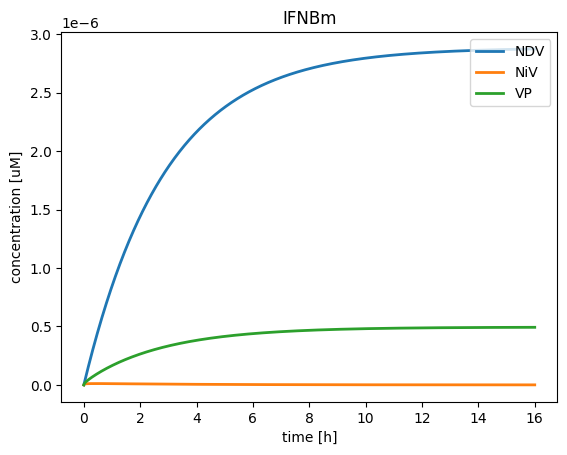

In [ ]:
# @title Run and plot time series
print("y axis units are micro Mols per mL, x axis is time in hours")
keys = {}
keys['NDV'] = check_.value
keys['NiV'] = check_VPW.value
keys['NDV-V'] = check_V.value
keys['NDV-P'] = check_P.value
keys['NDV-W'] = check_W.value
keys['VP'] = check_VP.value
keys['PW'] = check_PW.value
keys['VW'] = check_VW.value
simulator(r, species_selection.value[0], vmax2_slider.value, k12_slider.value, vmax20_slider.value, vmax19_slider.value, sp1_slider.value, keys)

**Exercise 1)** Look at equation 29 and answer: will IFNBm increase to infinity or will it reach a steady state?

In [ ]:
# @title Exercise 1 answer
print("The equation says that IFNBm tends to a fixed point because there is a decay and the production rates are limited. \nPlot IFNBm for the default parameters, selecting the option NDV (none)")

**Exercise 2)** Look at equation 30 and answer: will IFNBenv increase to infinity or will it reach a steady state?

In [ ]:
# @title Exercise 2 answer
print("The equation says that IFNBenv is promoted by IFNBm, and it has no decay, so it should increase linearly to infinity as time goes by. \nPlot IFNBenv for the default parameters, selecting the option NDV (none). \nNote that the curves are exponential initially, but they then become linear for longer times.")

**Exercise 3)** In the NDV case, what happens to IFNBenv when we increase the production rate of IFNBenv by IFNBm (parameter vmax2)?

In [ ]:
# @title Exercise 3 answer
print("By plotting IFNBenv and changing the parameter vmax2, you should see the scale in the y axis changing as you change the value of the parameter vmax2, and the scale increases as you increase vmax2.")

By plotting IFNBenv and changing the parameter vmax2, you should see the scale in the y axis changing as you change the value of the parameter vmax2, and the scale increases as you increase vmax2.


**Exercise 4)** In the paper, the experiments show that P is the weakest protein in suppressing the production of cytokines (IFNA/B, TNFA, CCL4 and CCL5), followed by V, and W is the strongest of all. Plot any of the cytokine mRNA (for example, IFNBm or TNFAm) and check if the curves organize as expected.

In [ ]:
# @title Exercise 4 answer
print("By plotting IFNBm, I see that the curves organize from highest to lowest: NDV, NDV+P, NDV+V and NDV+W, showing that the order matches the experimental observation.\nSame happens for TNFAm, CCL4m, CCL5m and IFNAm.")

By plotting IFNBm, I see that the curves organize from highest to lowest: NDV, NDV+P, NDV+V and NDV+W, showing that the order matches the experimental observation.
Same happens for TNFAm, CCL4m, CCL5m and IFNAm.


**Exercise 5)** In drug development, it is crucial that the drug is specific. A perfect drug in this scenario should only affect particles and processes associated to the virus. Pick a target for a drug and explain what it does.

In [ ]:
# @title Exercise 5 answer
print("In my opinion, the perfect target for a drug is the W protein. Any chemical substance capable of binding to W proteins would prevent it from suppressing initial TNFA pathway.\n Besides being the most powerful suppressor, cells don't normally produce W protein and don't need it to survive, so eliminating any W protein in the human body would not be a problem. \nThere are a few problems: \n1) STAT pathway is still suppressed by V and P, \n2) the drug should be able to enter the cell nucleus, because W acts inside the nucleus, and \n3) this drug should be administered very early in the infection.\n")

In my opinion, the perfect target for a drug is the W protein. Any chemical substance capable of binding to W proteins would prevent it from suppressing initial TNFA pathway.
 Besides being the most powerful suppressor, cells don't normally produce W protein and don't need it to survive, so eliminating any W protein in the human body would not be a problem. 
There are a few problems: 
1) STAT pathway is still suppressed by V and P, 
2) the drug should be able to enter the cell nucleus, because W acts inside the nucleus, and 
3) this drug should be administered very early in the infection.



**Exercise 6)** The first problem in our (mine, because I cannot access your mind in the future) is actually testable in the model. Suppose Nipah Virus (with all three proteins) enters a cell with this hypothetical drug that binds to W proteins and leave them inoperant in the cell. Would the cell be able to produce appreciable levels of TNFAm and IFNBm?

In [ ]:
# @title Exercise 6 answer
print("Yes. To test it, select NDV, NiV and the theoretical recombinant option V+P, which supposes a virus without the capacity to produce W proteins (or, in our case, inoperant W proteins).\nNow plot TNFAm and IFNBm for the three options together.\nAlthough the production of cytokines is still significantly reduced by V and P, it is not completely suppressed by W protein, the strongest of the three.")

Yes. To test it, select NDV, NiV and the theoretical recombinant option V+P, which supposes a virus without the capacity to produce W proteins (or, in our case, inoperant W proteins).
Now plot TNFAm and IFNBm for the three options together.
Although the production of cytokines is still significantly reduced by V and P, it is not completely suppressed by W protein, the strongest of the three.
